# YouTube Ranking
---
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube

## 1. YouTube 랭킹 데이터 수집

In [1]:
import time
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [2]:
service=Service('../chromedriver/chromedriver.exe')
driver=webdriver.Chrome(service=service)

In [3]:
url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [4]:
channels=soup.select('td.subject')
print(channels[0])
print(len(channels))

<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="fa fa-comment"></i>
								1							</span>
<i aria-hidden="true" class="fa fa-heart"></i> </h1>
<h2><span><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">"YG Entertainment" YG 와이지 K-pop BLACKPINK 블랙핑크 블핑 제니 로제 리사 지수 Lisa Jisoo Jennie ...</a></span></h2>
<h3>
<i class="fa fa-user"></i>
                            7130만<i class="fa fa-play"></i>220억2860만                            <i class="fa fa-video-camera"></i>
                            395                            <i class="fa fa-eye"></i>
                            18,155          

In [5]:
str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()

['h3',
 'class="fa',
 'fa-user"',
 '7130만',
 'class="fa',
 'fa-play"',
 '220억2860만',
 'class="fa',
 'fa-v',
 'deo-camera"',
 '395',
 'class="fa',
 'fa-eye"',
 '18,155',
 'h3']

In [6]:
# title, category, subscriber, view, video
title=channels[0].select('a')[0].text.strip()
print(title)
category=channels[0].select('p.category')[0].text.strip()
print(category)
subscriber=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[3]
print(subscriber)
view=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[6]
print(view)
video=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[10]
print(video)

BLACKPINK
[음악/댄스/가수]
7130만
220억2860만
395


In [7]:
for chan in channels:
    title=chan.select('a')[0].text.strip()
    category=chan.select('p.category')[0].text.strip()
    subscriber=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[3]
    view=str(chan.select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[6]
    video=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[10]
    print(title, category, subscriber, view, video,sep=' , ')

BLACKPINK , [음악/댄스/가수] , 7130만 , 220억2860만 , 395
HYBE LABELS , [음악/댄스/가수] , 7130만 , 210억1371만 , 395
BANGTANTV , [음악/댄스/가수] , 7130만 , 146억8130만 , 395
SMTOWN , [음악/댄스/가수] , 7130만 , 234억3321만 , 395
Boram Tube Vlog [보람튜브 브이로그] , [키즈/어린이] , 7130만 , 110억5288만 , 395
1MILLION Dance Studio , [음악/댄스/가수] , 7130만 , 70억0543만 , 395
1theK (원더케이) , [음악/댄스/가수] , 7130만 , 215억4518만 , 395
JYP Entertainment , [음악/댄스/가수] , 7130만 , 153억5057만 , 395
Mnet K-POP , [음악/댄스/가수] , 7130만 , 142억1584만 , 395
KBS WORLD TV , [TV/방송] , 7130만 , 130억6970만 , 395
JFlaMusic , [음악/댄스/가수] , 7130만 , 35억3017만 , 395
Jane ASMR 제인 , [음식/요리/레시피] , 7130만 , 56억9872만 , 395
officialpsy , [음악/댄스/가수] , 7130만 , 89억1662만 , 395
BIGBANG , [음악/댄스/가수] , 7130만 , 68억8615만 , 395
TWICE , [음악/댄스/가수] , 7130만 , 28억7342만 , 395
Hongyu ASMR 홍유 , [음식/요리/레시피] , 7130만 , 32억8533만 , 395
Nao FunFun , [키즈/어린이] , 7130만 , 459만 , 395
Stone Music Entertainment , [음악/댄스/가수] , 7130만 , 83억7984만 , 395
DuDuPopTOY , [키즈/어린이] , 7130만 , 45억7419만 , 395
핑크퐁 (인기 동요・동화) , [키즈/어린이

In [8]:
# 페이지별 url 만들기
res=[]
for p in range(1,11):
    url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(p)
    driver.get(url)
    time.sleep(2)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    channels=soup.select('td.subject')
    for chan in channels:
        title=chan.select('a')[0].text.strip()
        category=chan.select('p.category')[0].text.strip()
        subscriber=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[3]
        view=str(chan.select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[6]
        video=str(channels[0].select('h3')[0]).translate(str.maketrans('</i>','    ')).split()[10]
        data=[title,category,subscriber,view,video]
        res.append(data)
        

In [9]:
df=pd.DataFrame(res)
df.columns=['title','category','subscriber','view','video']
df.to_excel('./files/my_youtube_rank.xlsx',index=False)

---
## 2. 랭킹 데이터 시각화하기 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df=pd.read_excel('./files/my_youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7130만,220억2860만,395
1,HYBE LABELS,[음악/댄스/가수],7130만,210억1371만,395
2,BANGTANTV,[음악/댄스/가수],7130만,146억8130만,395
3,SMTOWN,[음악/댄스/가수],7130만,234억3321만,395
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],7130만,110억5288만,395


In [12]:
df['re_subscriber']=df['subscriber'].str.replace('만','0000').astype('int')
df.head()

,title,category,subscriber,view,video,re_subscriber
0,BLACKPINK,[음악/댄스/가수],7130만,220억2860만,395,71300000
1,HYBE LABELS,[음악/댄스/가수],7130만,210억1371만,395,71300000
2,BANGTANTV,[음악/댄스/가수],7130만,146억8130만,395,71300000
3,SMTOWN,[음악/댄스/가수],7130만,234억3321만,395,71300000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],7130만,110억5288만,395,71300000


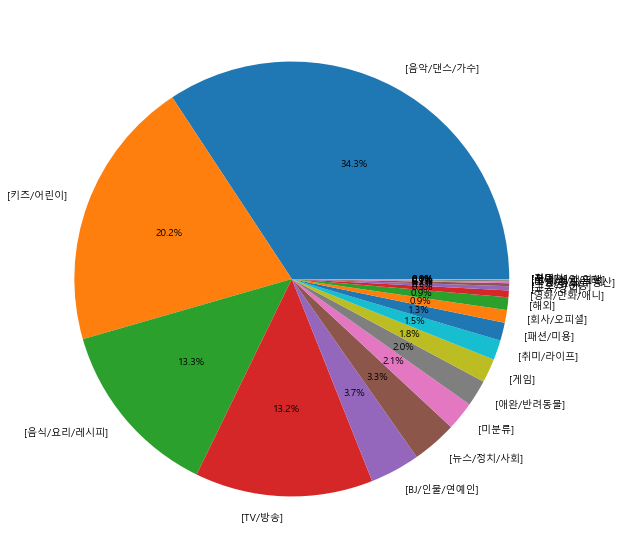

In [13]:
pivot_df=df.pivot_table(index='category',values='re_subscriber',aggfunc=['sum','count'])
pivot_df.columns=['subscriber_sum','category_count']
pivot_df=pivot_df.reset_index()
pivot_df=pivot_df.sort_values(by='subscriber_sum',ascending=False)

plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

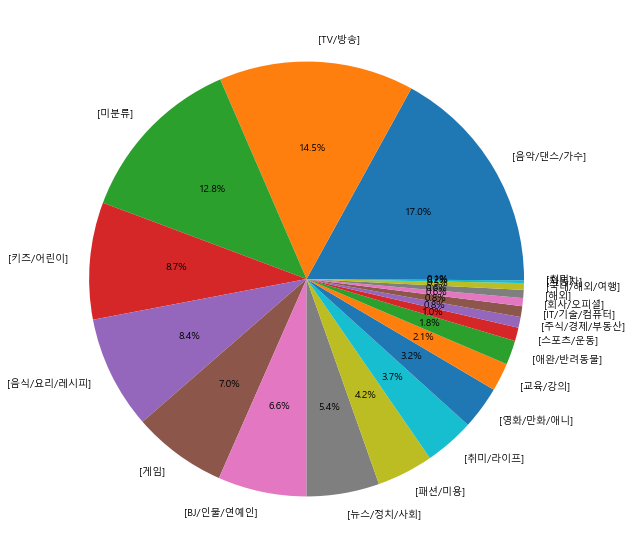

In [14]:
pivot_df=pivot_df.sort_values(by='category_count',ascending=False)

plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()